In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df_scaled = pd.read_csv("lrfs_features.csv")
X = df_scaled[['L','R','F','S']]
y = df_scaled['Revenue']

In [ ]:
pca = PCA(n_components=2)   # 2D for plotting
X_pca = pca.fit_transform(X)

In [ ]:
df_pca = pd.DataFrame(X_pca, columns=['PC1','PC2'])
df_pca['Revenue'] = y

In [ ]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.30027532 0.27745584]
Total variance explained: 0.5777311630686943


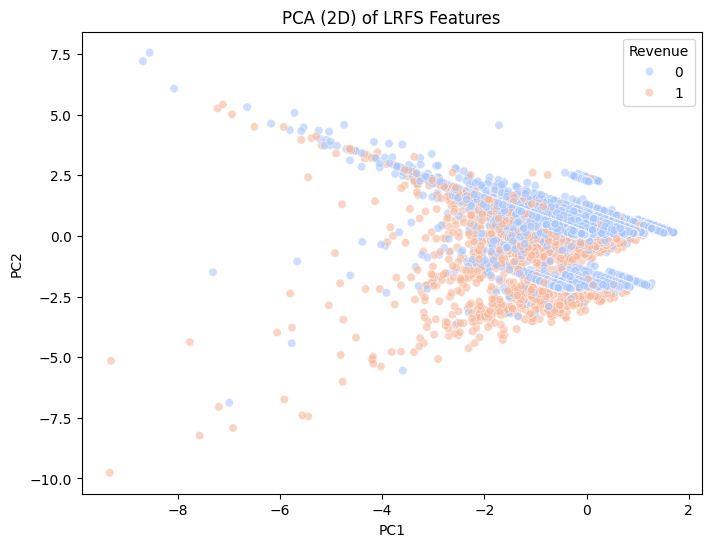

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Revenue', palette='coolwarm', alpha=0.6)
plt.title("PCA (2D) of LRFS Features")
plt.show()

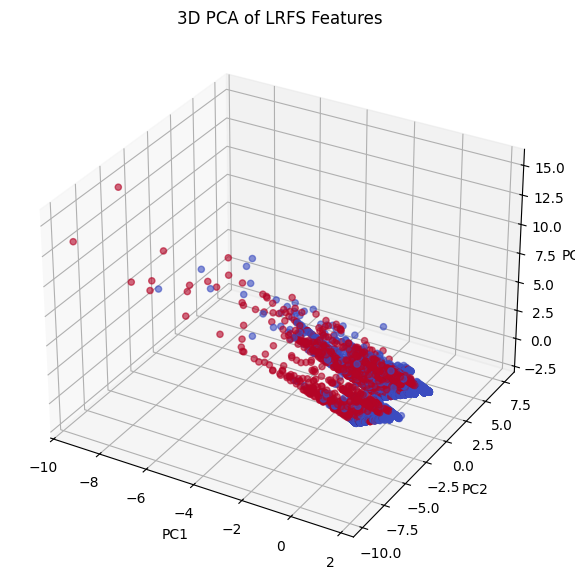

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2],
                     c=y, cmap='coolwarm', alpha=0.6)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3D PCA of LRFS Features")
plt.show()


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df_scaled = pd.read_csv("lrfs_features.csv")
X = df_scaled[['L','R','F','S']]
y = df_scaled['Revenue']

In [ ]:
X_sample = X.sample(5000, random_state=42)
y_sample = y.loc[X_sample.index]

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_sample)


In [ ]:
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['Revenue'] = y

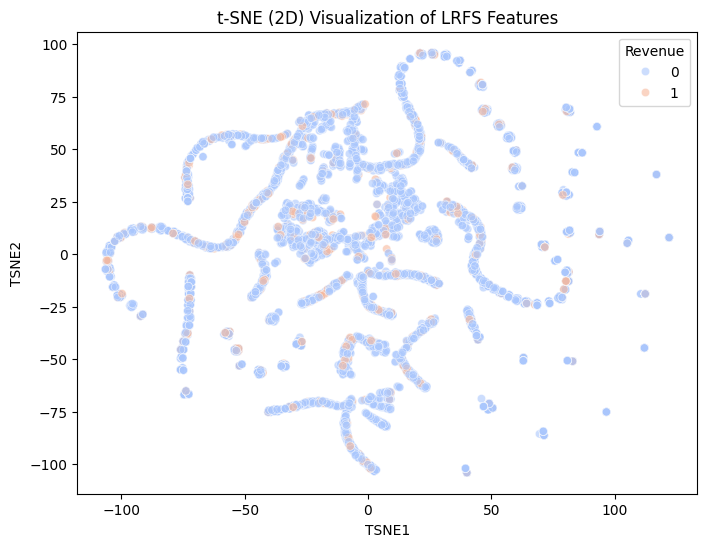

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Revenue', palette='coolwarm', alpha=0.6)
plt.title("t-SNE (2D) Visualization of LRFS Features")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
df_scaled = pd.read_csv("lrfs_features.csv")

X = df_scaled[['L', 'R', 'F', 'S']]
y = df_scaled['Revenue']

In [ ]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [ ]:
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))


In [ ]:
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
latent = Dense(2, activation='linear', name='latent_space')(encoded)

In [ ]:
decoded = Dense(8, activation='relu')(latent)
decoded = Dense(16, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

In [ ]:
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

autoencoder.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_space (Dense)            │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 470 (1.84 KB)

 Trainable params: 470 (1.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=32,
                validation_data=(X_test, X_test),
                verbose=1)


Epoch 1/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7956 - val_loss: 0.2729
Epoch 2/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2682 - val_loss: 0.2186
Epoch 3/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2192 - val_loss: 0.1181
Epoch 4/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1169 - val_loss: 0.0893
Epoch 5/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0869 - val_loss: 0.0824
Epoch 6/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0853 - val_loss: 0.0764
Epoch 7/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0788 - val_loss: 0.0719
Epoch 8/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0644 - val_loss: 0.0678
Epoch 9/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0627 - val_loss: 0.0594
Epoch 10/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0561 - val_loss: 0.0604
Epoch 11/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0561 - val_loss: 0.0512
Epoch 12/100
309/309 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
encoder_model = Model(inputs=input_layer, outputs=latent)
X_encoded = encoder_model.predict(X)

386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


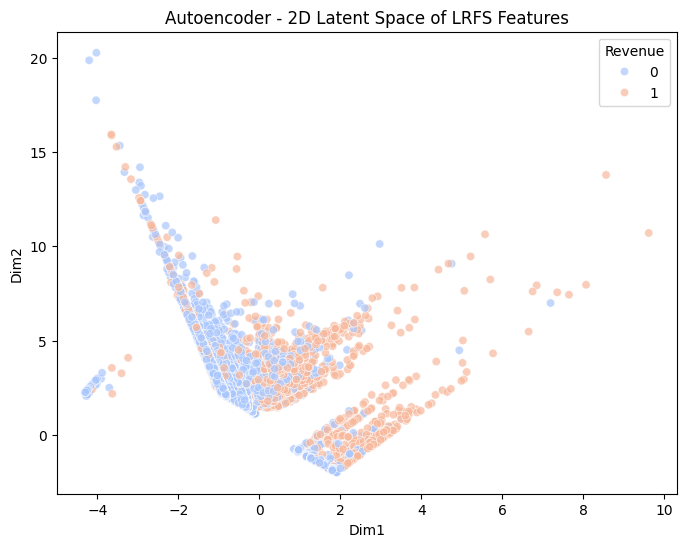

In [ ]:
df_encoded = pd.DataFrame(X_encoded, columns=['Dim1', 'Dim2'])
df_encoded['Revenue'] = y

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_encoded, x='Dim1', y='Dim2', hue='Revenue', palette='coolwarm', alpha=0.7)
plt.title("Autoencoder - 2D Latent Space of LRFS Features")
plt.show()


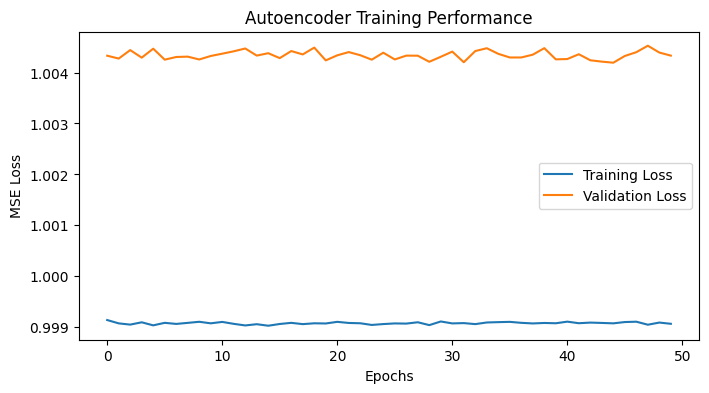

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Performance')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
df_encoded.to_csv("encoded_features.csv", index=False)
print("✅ Encoded latent features saved at 'encoded_features.csv'")

✅ Encoded latent features saved at 'encoded_features.csv'


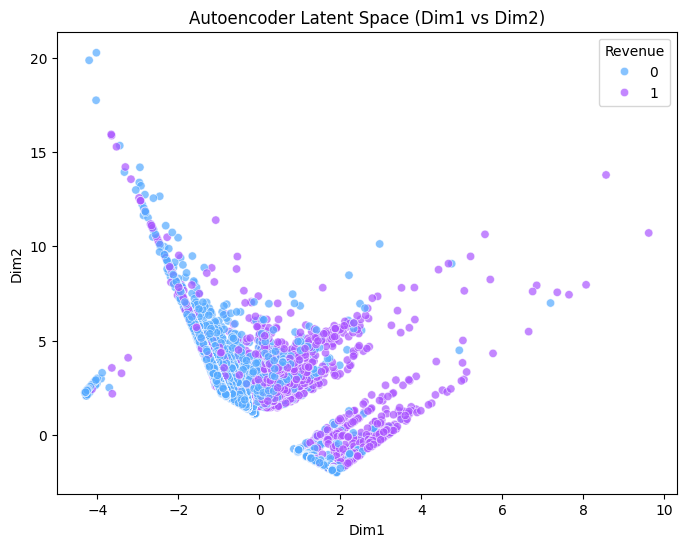

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded = pd.read_csv("encoded_features.csv")

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_encoded, x='Dim1', y='Dim2', hue='Revenue', palette='cool', alpha=0.7)
plt.title("Autoencoder Latent Space (Dim1 vs Dim2)")
plt.show()
